In [19]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from scipy.optimize import minimize
import statsmodels.api as sm

* DATE
* TICKER
* COMNAM - The company name
* PRIMEXCH - The exchange where the stock trades ("N" if it trades on NYSE, and "Q" if it trades on NASDAQ)
* PRC - The closing price
* VOL - Trading volume
* SHROUT - The number of shares outstanding (in thousands)
* CFACPR - Cumulative factor to adjust the closing price
* CFACSHR - Cumulative factor to adjust shares outstanding
* SPRTRN - The return on the S&P500 index

In [20]:
fin_data = pd.read_csv('fin_data.csv', index_col = 'DATE', parse_dates = True)
fin_data.head()

,TICKER,COMNAM,PRIMEXCH,PRC,VOL,SHROUT,CFACPR,CFACSHR,SPRTRN
DATE,,,,,,,,,
2014-01-02,MSFT,MICROSOFT CORP,Q,37.16,30423757,8300000,1,1,-0.008862
2014-01-03,MSFT,MICROSOFT CORP,Q,36.91,30944370,8300000,1,1,-0.000333
2014-01-06,MSFT,MICROSOFT CORP,Q,36.13,43111355,8300000,1,1,-0.002512
2014-01-07,MSFT,MICROSOFT CORP,Q,36.41,35478667,8300000,1,1,0.006082
2014-01-08,MSFT,MICROSOFT CORP,Q,35.76,59452427,8300000,1,1,-0.000212


In [21]:
#select 3 random stocks
np.random.seed (1000)
ticker_list = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ',
               'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']
stock_lst = [ticker_list[x] for x in np.random.randint(0,27,3)]
stock_lst

['PFE', 'UTX', 'KO']

In [22]:
#Compute daily return for each stock
ret1_data = fin_data[fin_data['TICKER'] == stock_lst[0]][['TICKER', 'PRC','CFACPR']]
ret1_data['ADJ_PRC'] = ret1_data['PRC']/ret1_data['CFACPR']
ret1_data['RET_PFE'] = ret1_data['ADJ_PRC'].pct_change()
ret1_data['RET_PFE2'] = (ret1_data['ADJ_PRC']/ret1_data['ADJ_PRC'].shift(1))-1
ret1_data.head()

,TICKER,PRC,CFACPR,ADJ_PRC,RET_PFE,RET_PFE2
DATE,,,,,,
2014-01-02,PFE,30.46,1,30.46,NaN,NaN
2014-01-03,PFE,30.52,1,30.52,0.001970,0.001970
2014-01-06,PFE,30.55,1,30.55,0.000983,0.000983
2014-01-07,PFE,30.74,1,30.74,0.006219,0.006219
2014-01-08,PFE,30.95,1,30.95,0.006831,0.006831


In [23]:
ret2_data = fin_data[fin_data['TICKER'] == stock_lst[1]][['TICKER', 'PRC','CFACPR']]
ret2_data['ADJ_PRC'] = ret2_data['PRC']/ret2_data['CFACPR']
ret2_data['RET_UTX'] = ret2_data['ADJ_PRC'].pct_change()
ret2_data['RET_UTX2'] = (ret2_data['ADJ_PRC']/ret2_data['ADJ_PRC'].shift(1))-1
ret2_data.head()

,TICKER,PRC,CFACPR,ADJ_PRC,RET_UTX,RET_UTX2
DATE,,,,,,
2014-01-02,UTX,112.49,1,112.49,NaN,NaN
2014-01-03,UTX,112.90,1,112.90,0.003645,0.003645
2014-01-06,UTX,112.79,1,112.79,-0.000974,-0.000974
2014-01-07,UTX,113.51,1,113.51,0.006384,0.006384
2014-01-08,UTX,113.65,1,113.65,0.001233,0.001233


In [24]:
ret3_data = fin_data[fin_data['TICKER'] == stock_lst[2]][['TICKER', 'PRC','CFACPR']]
ret3_data['ADJ_PRC'] = ret3_data['PRC']/ret3_data['CFACPR']
ret3_data['RET_KO'] = ret3_data['ADJ_PRC'].pct_change()
ret3_data['RET_KO2'] = (ret3_data['ADJ_PRC']/ret3_data['ADJ_PRC'].shift(1))-1
ret3_data.head()

,TICKER,PRC,CFACPR,ADJ_PRC,RET_KO,RET_KO2
DATE,,,,,,
2014-01-02,KO,40.66,1,40.66,NaN,NaN
2014-01-03,KO,40.46,1,40.46,-0.004919,-0.004919
2014-01-06,KO,40.27,1,40.27,-0.004696,-0.004696
2014-01-07,KO,40.39,1,40.39,0.002980,0.002980
2014-01-08,KO,39.94,1,39.94,-0.011141,-0.011141


In [25]:
df_ret = pd.concat([ret1_data,ret2_data,ret3_data],axis=1)[['RET_PFE','RET_UTX','RET_KO']]
df_ret.describe()

,RET_PFE,RET_UTX,RET_KO
count,1257.000000,1257.000000,1257.000000
mean,0.000348,0.000019,0.000159
std,0.011098,0.011179,0.008682
min,-0.052991,-0.070329,-0.060291
25%,-0.005110,-0.005340,-0.004230
50%,0.000000,0.000235,0.000436
75%,0.005705,0.005836,0.005014
max,0.070667,0.047644,0.037439


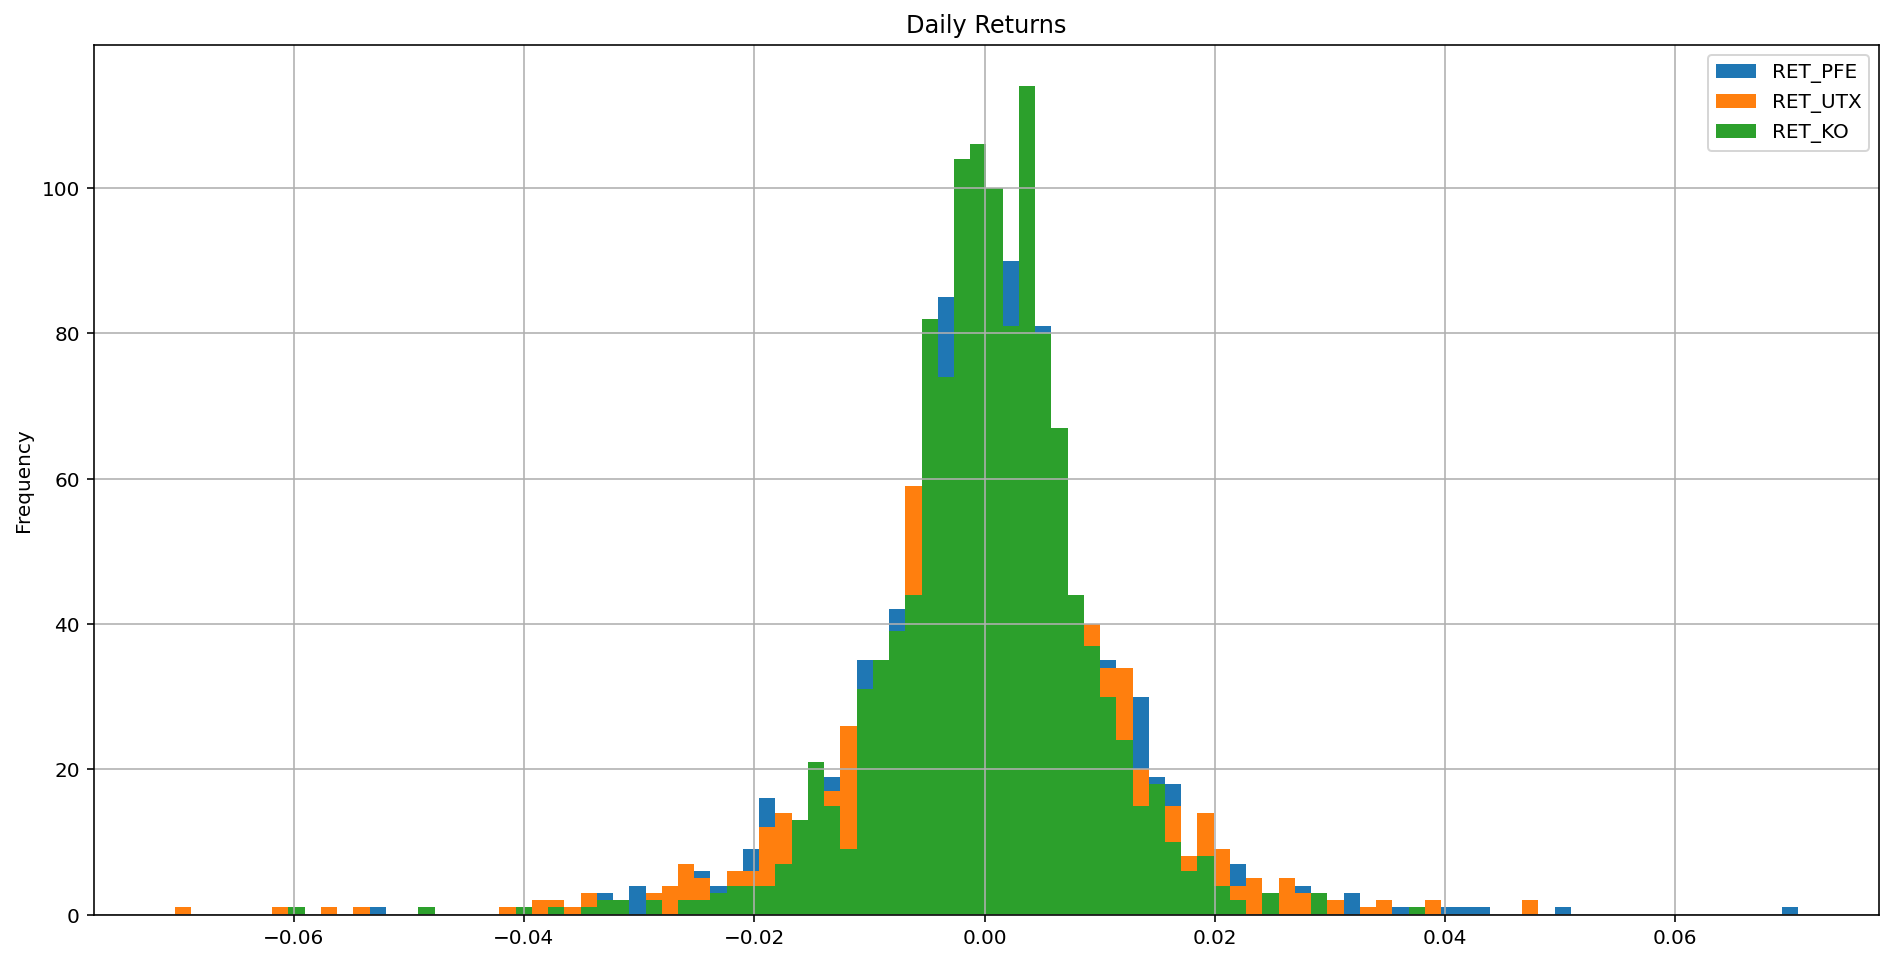

In [26]:
# visualize daily returns for the stocks
df_ret.plot.hist(y = ['RET_PFE', 'RET_UTX', 'RET_KO'],
                 bins = 100,figsize = (16,8), title = 'Daily Returns', grid = True);

In [30]:
# cumulative return over the entire sample
df_ret['CRET_PFE'] = (1 + df_ret['RET_PFE']).cumprod()-1
df_ret['CRET_UTX'] = (1 + df_ret['RET_UTX']).cumprod()-1
df_ret['CRET_KO'] = (1 + df_ret['RET_KO']).cumprod()-1
df_cret = df_ret.copy()[['CRET_PFE','CRET_UTX','CRET_KO']]
df_cret.head()

,CRET_PFE,CRET_UTX,CRET_KO
DATE,,,
2014-01-02,NaN,NaN,NaN
2014-01-03,0.001970,0.003645,-0.004919
2014-01-06,0.002955,0.002667,-0.009592
2014-01-07,0.009192,0.009067,-0.006640
2014-01-08,0.016087,0.010312,-0.017708


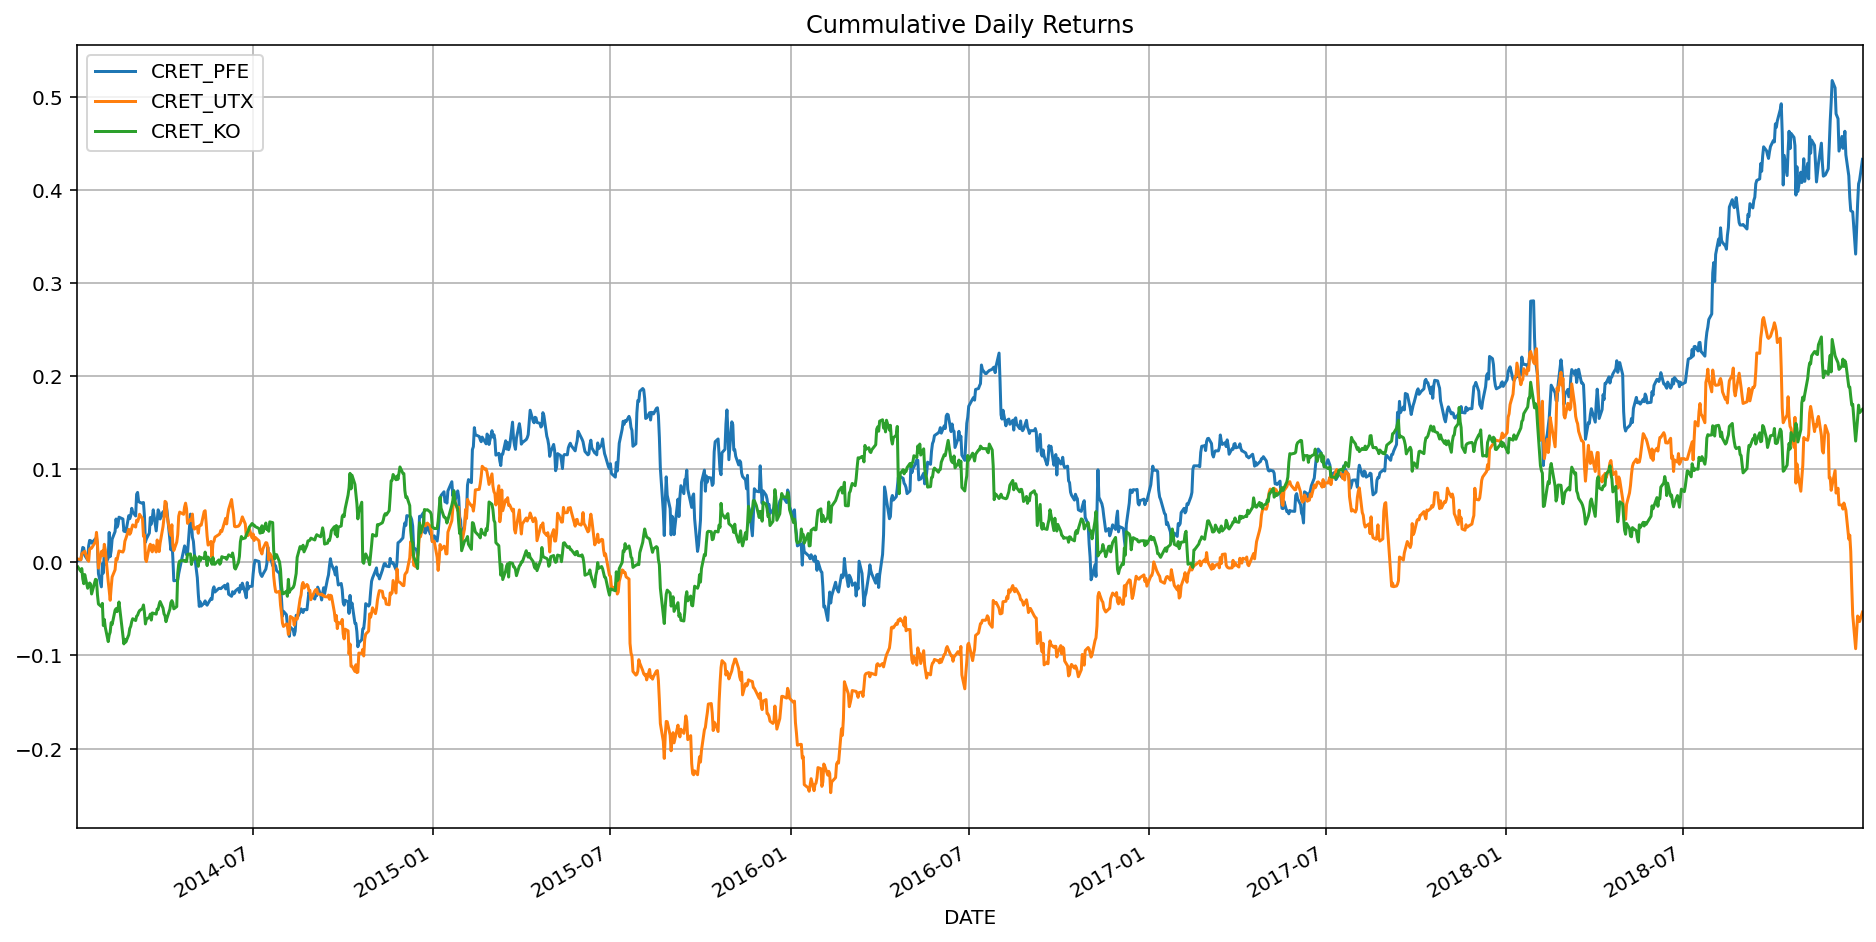

In [31]:
# plot cumulative return
df_cret.plot.line(y = ['CRET_PFE', 'CRET_UTX', 'CRET_KO'],
                 figsize = (16,8), title = 'Cummulative Daily Returns', 
                  grid = True, xlim = ('2014-01-02','2018-12-31'));

In [37]:
# select 5 companies that traded between 2012 - 2018
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2018, 12, 31)

returns = pd.DataFrame()
ticker_list = ['AAPL', 'JPM', 'XOM', 'DIS', 'MCD']
for ticker in ticker_list:
    returns['RET_'+ticker] = \
    np.log(1+(web.DataReader(ticker,'yahoo',start,end)['Adj Close'].pct_change()))
    
returns.head()

,RET_AAPL,RET_JPM,RET_XOM,RET_DIS,RET_MCD
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.006315,0.000233,0.013997,0.005549
2012-01-05,0.011041,0.020672,-0.003027,0.016593,0.004417
2012-01-06,0.010399,-0.009010,-0.007491,0.010326,0.007683
2012-01-09,-0.001588,-0.001698,0.004455,-0.004017,-0.009589


In [38]:
returns_mon = returns.resample(rule='BM').sum()
returns_mon.head()

,RET_AAPL,RET_JPM,RET_XOM,RET_DIS,RET_MCD
Date,,,,,
2012-01-31,0.104392,0.071390,-0.026631,0.015283,0.002122
2012-02-29,0.172533,0.050703,0.037886,0.076437,0.009319
2012-03-30,0.100102,0.158510,0.002656,0.041745,-0.011957
2012-04-30,-0.026312,-0.060947,-0.004507,-0.015422,-0.006648
2012-05-31,-0.010760,-0.259692,-0.086674,0.058562,-0.079092


In [68]:
# store the risk-free rate from 2012-2016
rf_rate = pd.read_csv('/users/Jakob Bradford/desktop/ff_factors.csv', 
                         usecols = ['dateff','rf'],
                       index_col = 'dateff',
                       parse_dates = True)
rf_rate.rename({'dateff': 'Date'}, axis = 1, inplace = True)

In [69]:
rf_rate = rf_rate['2012/1/1':'2016/12/31']
rf_rate.head()

,rf
dateff,
2012-01-31,0.0000
2012-02-29,0.0000
2012-03-30,0.0000
2012-04-30,0.0000
2012-05-31,0.0001


In [70]:
# Define the portfolio returns function
def port_ret(weights):
    port_ret = np.sum(data_initial.mean()*weights*12)
    return port_ret

# Define the portfolio standard deviation function
def port_std(weights):
    port_std = np.sqrt(np.dot(weights.T, np.dot(data_initial.cov()*12, weights)))
    return port_std

# Define the negative Sharpe Ratio function that we will minimize
def neg_SR(weights):
    SR = (port_ret(weights) - rf_rate['rf'].mean()*12)/port_std(weights)
    return (-1)*SR

# By convention of minimize function it should be a function that\
# returns zero for conditions
constraints = ({'type':'eq','fun': lambda weights: np.sum(weights) - 1})

# Weights must be between 0 and 1
bounds = ((-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1))

# Initial Guess (equally weighted)
init_guess = [1/5, 1/5, 1/5, 1/5, 1/5]

# Use the SLSQP (Sequential Least Squares Programming) for minimization
optimal_port = minimize(neg_SR,init_guess,method='SLSQP',bounds = bounds, constraints=constraints)

In [71]:
optimal_port

     fun: -1.4097464730911997
     jac: array([-0.00264668, -0.00270328, -0.00283022, -0.00267629, -0.00274874])
 message: 'Optimization terminated successfully'
    nfev: 61
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([ 0.18057826,  0.4167629 , -0.74101342,  0.97611162,  0.16756064])

In [72]:
# the optimal portfolio weights for AAPL, JPM, XOM, DIS, MCD
optimal_port.x

array([ 0.18057826,  0.4167629 , -0.74101342,  0.97611162,  0.16756064])

In [73]:
# optimal expected return
port_ret(optimal_port.x)

0.3065165104623173

In [74]:
# optimal standard deviation
port_std(optimal_port.x)

0.21702945621948316

In [75]:
# sharpe ratio
-optimal_port.fun

1.4097464730911997

In [76]:
# Create an array of equally-spaced numbers that will represent our portfolio returns
frontier_y = np.arange(0,port_ret(optimal_port.x)+0.1,0.005)

frontier_x = []

for ret in frontier_y:
    constraints = ({'type':'eq','fun': lambda weights: np.sum(weights) - 1},
                {'type':'eq','fun': lambda weights: port_ret(weights) - ret})

    bounds = ((-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1))
    
    result = minimize(port_std,init_guess,method='SLSQP',bounds=bounds,constraints=constraints)
    
    frontier_x.append(result['fun'])

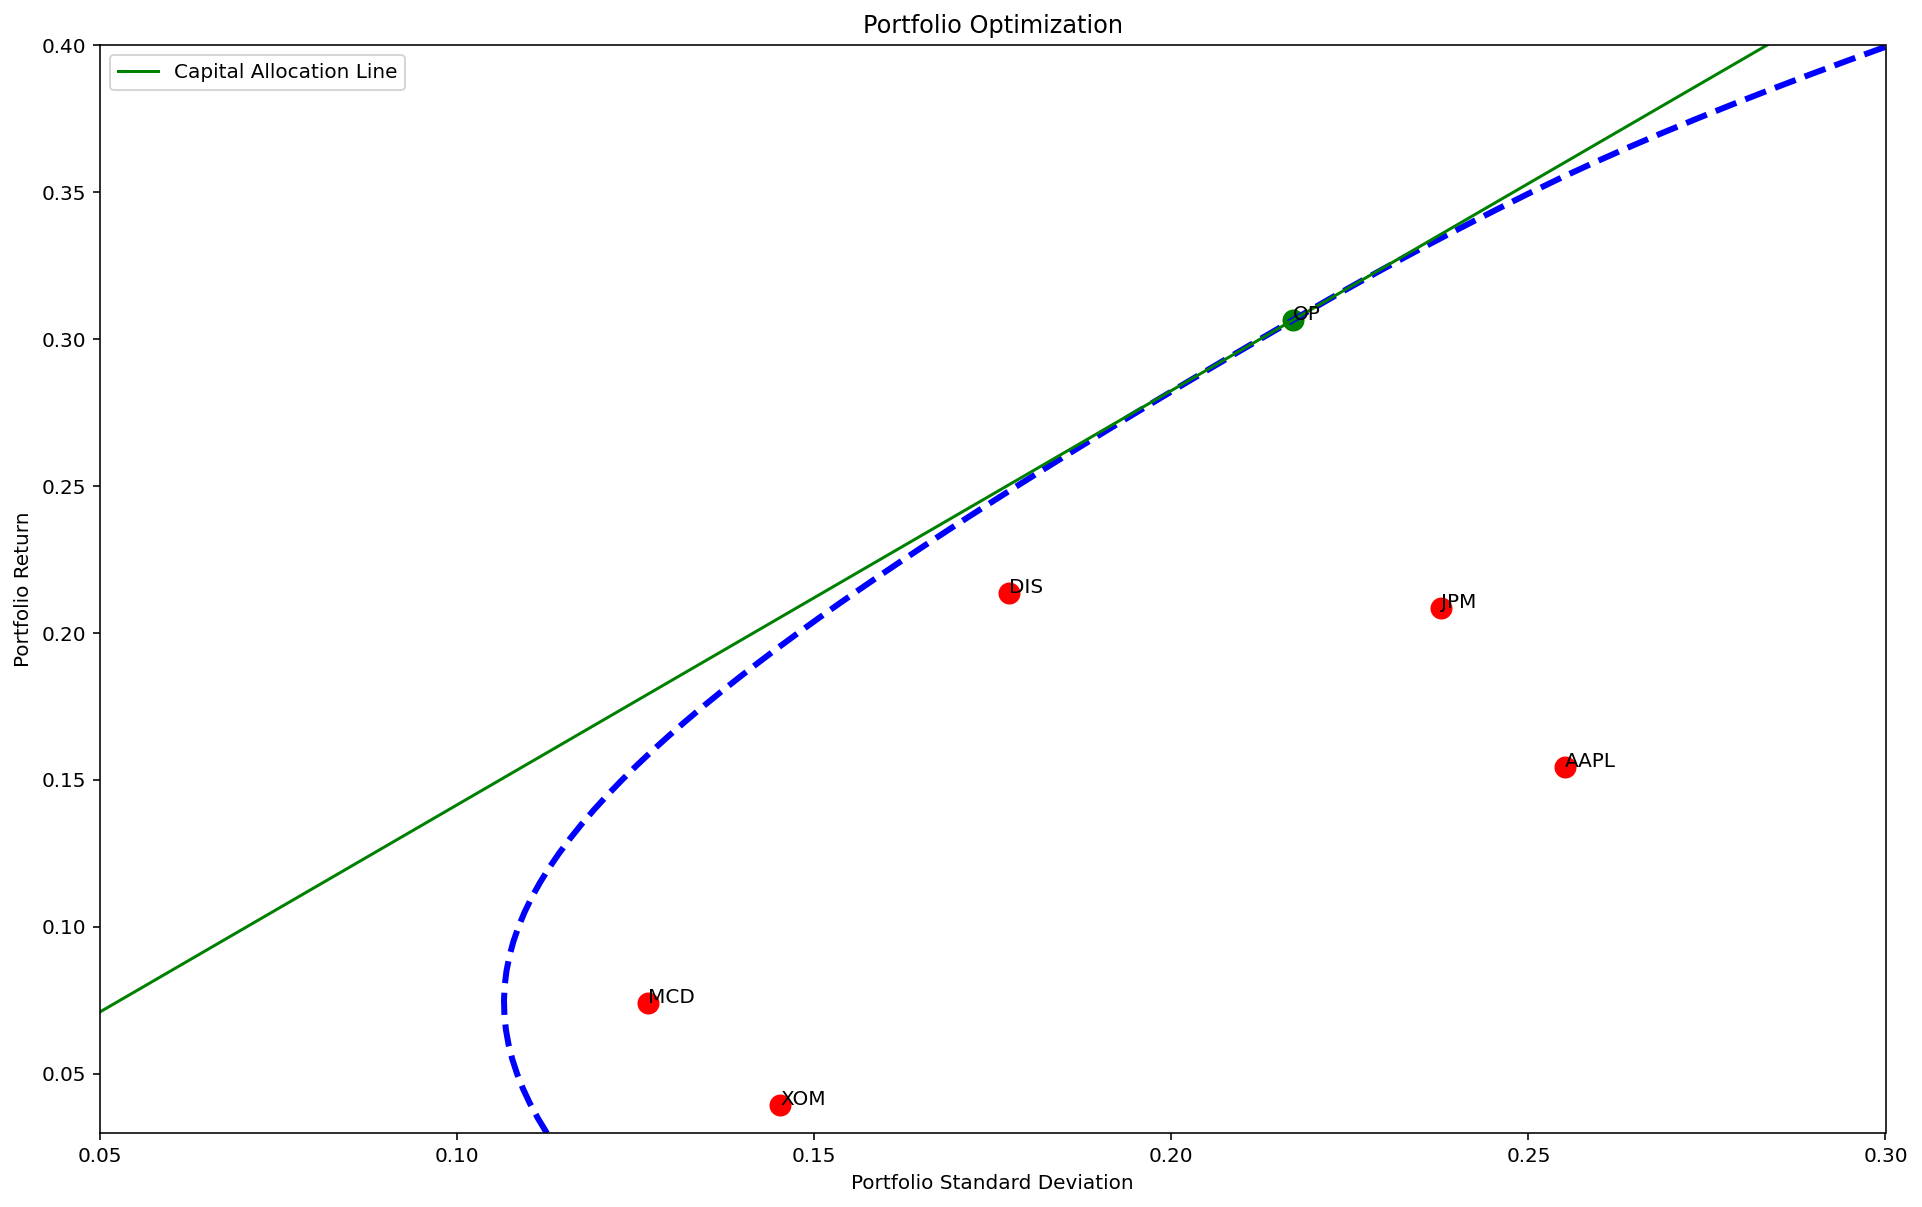

In [77]:
# Create figure, with a size of 16 by 10 inches
fig = plt.figure(figsize = (16,10))

# Add one subplot
ax = fig.add_subplot(1,1,1)

# Add frontier line
ax.plot(frontier_x,frontier_y,color = 'blue',\
        linestyle='--',linewidth=3)

# Add a green dot for the portfolio with the maximum 
# Sharpe Ratio (Optimal Risky Portfolio)
ax.scatter(port_std(optimal_port.x),\
           port_ret(optimal_port.x),color='green',s=100)
ax.annotate('OP',(port_std(optimal_port.x),\
                  port_ret(optimal_port.x)))

# Draw the Capital Allocation Line (CAL)
ax.plot(np.arange(0.0,0.3,0.01),(rf_rate['rf'].mean()*12)+\
        (-optimal_port.fun)*np.arange(0.00,0.3,0.01),
        color='green', label = 'Capital Allocation Line')

# Annotate the five stocks on the plot
for ticker in ticker_list:
    ax.annotate(ticker,(data_initial['RET_'+ticker].std()\
                        *np.sqrt(12), data_initial['RET_'+ticker].mean()*12))
    ax.scatter(data_initial['RET_'+ticker].std()*np.sqrt(12),\
               data_initial['RET_'+ticker].mean()*12,color='red',s=100)

ax.set_title('Portfolio Optimization')
ax.set_xlabel('Portfolio Standard Deviation')
ax.set_ylabel('Portfolio Return');
ax.set_xlim(0.05,0.3)
ax.set_ylim(0.03,0.4)
ax.legend(loc = 'best');

In [78]:
# create DataFrame to compare optimal weight strategy vs. equal weight strategy
weights = pd.DataFrame({'TICKER':ticker_list,
                            'Optimal_Weights':optimal_port.x,
                            'Equal_Weights':[0.2,0.2,0.2,0.2,0.2]})
weights.set_index('TICKER',inplace=True)
weights

,Optimal_Weights,Equal_Weights
TICKER,,
AAPL,0.180578,0.2
JPM,0.416763,0.2
XOM,-0.741013,0.2
DIS,0.976112,0.2
MCD,0.167561,0.2


In [79]:
# compare monthly returns over the course of two years
port_returns = pd.DataFrame({'Optimal_Portfolio':np.dot(data_post,weights['Optimal_Weights']),
                             'EW_Portfolio':np.dot(data_post,weights['Equal_Weights'])},
                                index=data_post.index)
port_returns.head()

,Optimal_Portfolio,EW_Portfolio
Date,,
2017-01-31,0.116464,0.005275
2017-02-28,0.070565,0.042960
2017-03-31,0.020722,0.013921
2017-04-28,0.033309,0.017513
2017-05-31,-0.062799,0.002062


In [80]:
port_returns.describe()

,Optimal_Portfolio,EW_Portfolio
count,24.000000,24.000000
mean,0.018056,0.006800
std,0.053854,0.032150
min,-0.072657,-0.102331
25%,-0.018638,0.001932
50%,0.021523,0.012564
75%,0.038674,0.022591
max,0.146159,0.044467


In [81]:
port_returns['CRET_OP']=port_returns['Optimal_Portfolio'].cumsum()
port_returns['CRET_EW']=port_returns['EW_Portfolio'].cumsum()
port_returns.head()

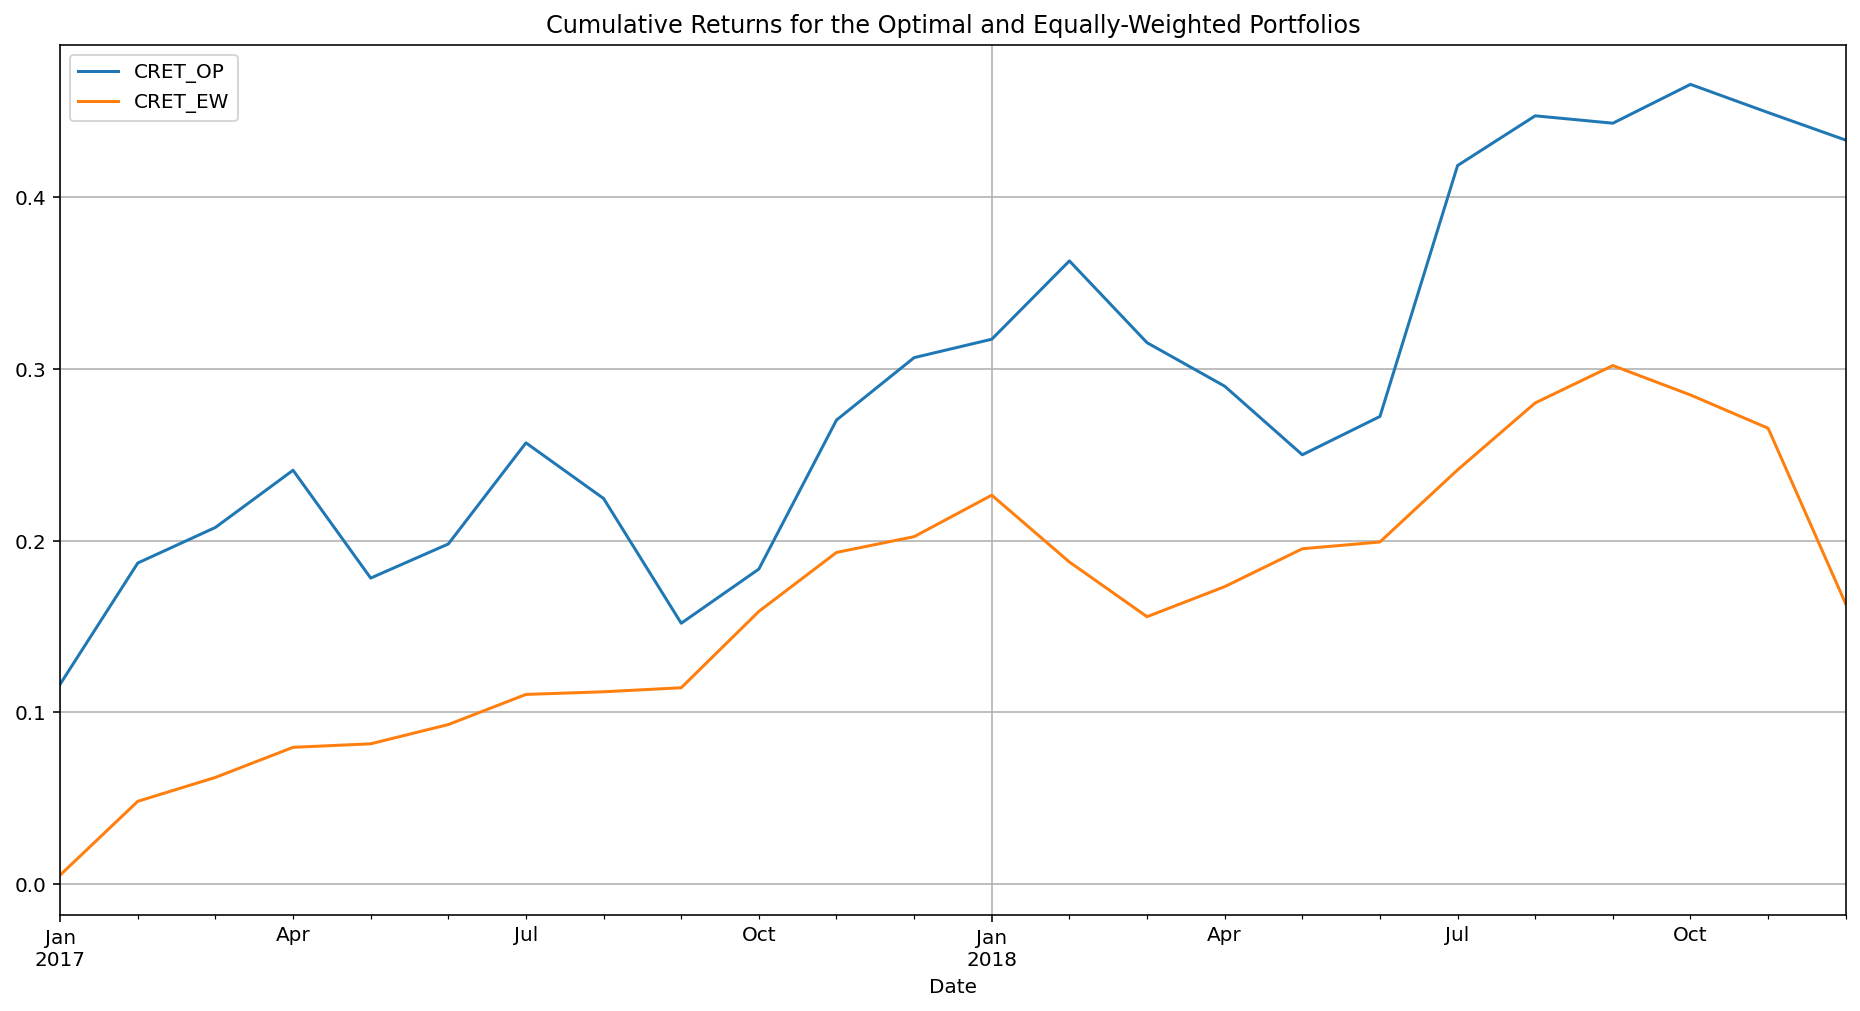

In [83]:
port_returns.plot.line(y = ['CRET_OP','CRET_EW'],figsize=(16,8),
                       title = 'Cumulative Returns for the Optimal and Equally-Weighted Portfolios',
                       grid=True);

In [97]:
# read in fama french data + merge with returns DataFrame
ff_factors = pd.read_csv('/users/Jakob Bradford/desktop/ff_factors.csv',
                       index_col = 'dateff',
                       parse_dates = True)
ff_factors.rename({'dateff': 'Date'}, inplace = True)
ff_factors.head()

,mktrf,smb,hml,rf,umd
dateff,,,,,
1926-07-31,0.0296,-0.0230,-0.0287,0.0022,NaN
1926-08-31,0.0264,-0.0140,0.0419,0.0025,NaN
1926-09-30,0.0036,-0.0132,0.0001,0.0023,NaN
1926-10-30,-0.0324,0.0004,0.0051,0.0032,NaN
1926-11-30,0.0253,-0.0020,-0.0035,0.0031,NaN


In [94]:
port_returns=port_returns.join(ff_factors, on ='Date')
port_returns.head()

,Optimal_Portfolio,EW_Portfolio,CRET_OP,CRET_EW,Opt-EW,mktrf,smb,hml,rf,umd
Date,,,,,,,,,,
2017-01-31,0.116464,0.005275,0.116464,0.005275,0.111189,0.0194,-0.0102,-0.0278,0.0004,-0.0097
2017-02-28,0.070565,0.042960,0.187029,0.048235,0.027605,0.0357,-0.0200,-0.0180,0.0004,-0.0166
2017-03-31,0.020722,0.013921,0.207750,0.062156,0.006801,0.0017,0.0119,-0.0318,0.0003,-0.0092
2017-04-28,0.033309,0.017513,0.241059,0.079669,0.015796,0.0109,0.0073,-0.0190,0.0005,0.0053
2017-05-31,-0.062799,0.002062,0.178260,0.081731,-0.064861,0.0106,-0.0255,-0.0378,0.0006,0.0147


In [92]:
# Test strategy
# Long on optimal portfolio
# Short on equal weights
port_returns['Opt-EW'] = port_returns['Optimal_Portfolio']-port_returns['EW_Portfolio']
port_returns.head()

,Optimal_Portfolio,EW_Portfolio,CRET_OP,CRET_EW,Opt-EW
Date,,,,,
2017-01-31,0.116464,0.005275,0.116464,0.005275,0.111189
2017-02-28,0.070565,0.042960,0.187029,0.048235,0.027605
2017-03-31,0.020722,0.013921,0.207750,0.062156,0.006801
2017-04-28,0.033309,0.017513,0.241059,0.079669,0.015796
2017-05-31,-0.062799,0.002062,0.178260,0.081731,-0.064861


#### FF 4-Factor Results for the Opt-Ew Portfolio

In [96]:
# Run FF 4-Factor model based on strategy
Y = port_returns['Opt-EW']-port_returns['rf']
X = sm.add_constant(port_returns[['mktrf','smb','hml', 'umd']])
reg = sm.OLS(Y,X, missing = 'drop').fit()
print(reg.summary(yname = 'Opt-EW', 
                  xname = ['Alpha', 'Beta', 'SMB', 'HML', 'UMD']))

                            OLS Regression Results                            
Dep. Variable:                 Opt-EW   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     1.597
Date:                Mon, 07 Jun 2021   Prob (F-statistic):              0.218
Time:                        16:51:51   Log-Likelihood:                 39.221
No. Observations:                  23   AIC:                            -68.44
Df Residuals:                      18   BIC:                            -62.76
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Alpha          0.0113      0.012      0.936      0.3